# Fast initial tests to check good ranges and behaviours
# with printout and visuals

In [2]:
import os
from functools import partial

import numpy
import scipy
from matplotlib import pyplot

import os

import pyhf
import cabinetry

from discohist import (
    fit_cabinetry,
    fit_cabinetry_post,
    fit_linspace,
    fit_normal,
    fit_signal,
    region,
    serial,
    blind,
    fit_mcmc_mix,
    mcmc_core,
)

from discohist.region_properties import region_properties

In [3]:
# fill me in
BASEPATH = "/home/tombs/Cambridge/interval-evidence/searches/atlas_susy_3Lresonance_2020/"

# fits

SRFR_580_inf_all
FitLinspace(start=0, stop=10, anchors=[2.8], levels=[120.9377735536329, 120.55611591361418, 120.64263559106809, 120.75692429222867, 120.88776908223701, 121.03057586022379, 121.18153280121177, 121.336967568508, 121.49332116444688, 121.64904904023504, 121.80369667618002, 121.95700938613041, 122.10884966052029, 122.25915054394179, 122.40788840386676, 122.55506767055331, 122.7007081415758, 122.84484123965024, 122.98750396395818, 123.12873700366279, 123.26858266234795, 123.40708356841807, 123.54428207065126, 123.680219751887, 123.81493681542779, 123.94847179966774, 124.08086276712348, 124.2121456407628, 124.34235428720336, 124.4715220182049, 124.59968000610806, 124.72685893228568, 124.85308678566771, 124.97839114389424, 125.10279881874901, 125.22633377260192, 125.34901899421045, 125.47087957093468, 125.59193594853483, 125.71220972388554, 125.83172003273376, 125.95048627470564, 126.0685273245119, 126.1431611614863, 126.20314841563851, 126.26209542764934, 126.32004330248395, 

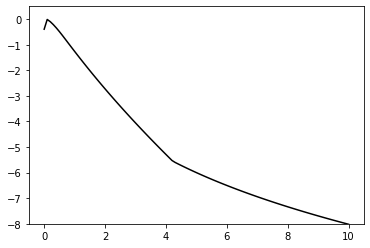

SR4l_170_190_all
FitLinspace(start=0, stop=12, anchors=[10.0], levels=[145.4988338168906, 144.90076402159866, 144.31420778685822, 143.73916436746214, 143.17563285489751, 142.6236102239246, 142.08309151432752, 141.55407183192833, 141.03654508994438, 140.53050317742208, 140.03593724780998, 139.55283882567767, 139.0811966191469, 138.62100023726552, 138.17223748620842, 137.73489671162787, 137.30896350928043, 136.89442630293078, 136.49127489613295, 136.09950104026225, 135.71909795704755, 135.35005210382644, 134.9923510719671, 134.64597926935733, 134.3109206637323, 133.98715747774077, 133.67467230752433, 133.37344712369537, 133.0834753335007, 132.80474822702678, 132.53725763827202, 132.28103444287404, 132.03610878603365, 131.80247750897934, 131.58011482978364, 131.36898066386493, 131.1690231462408, 130.9801845412136, 130.8025661043718, 130.63672756661828, 130.48284674989628, 130.34080339340838, 130.1199684857828, 129.80059038919245, 129.5393303222973, 129.3334256592677, 129.1804247267577, 12

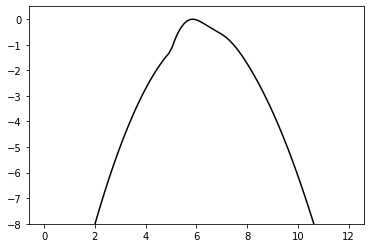

In [4]:
def main():
    region_name_to_scan = {
        "SRFR_580_inf_all": (2, 4),
        "SR4l_170_190_all": (2, 3),
#         # SRFR
#         "SRFR_90_110_all": (0, 5),
#         "SRFR_110_130_all": (0, 15),
#         "SRFR_130_150_all": (2, 17),
#         "SRFR_150_170_all": (0, 15),
#         "SRFR_170_190_all": (2, 13),
#         "SRFR_190_210_all": (0, 10),
#         "SRFR_210_230_all": (0, 50),
#         "SRFR_230_250_all": (0, 5),
#         "SRFR_250_270_all": (0.1, 5),
#         "SRFR_270_300_all": (0, 8),
#         "SRFR_300_330_all": (0, 3),
#         "SRFR_330_360_all": (0, 4),
#         "SRFR_360_400_all": (0, 8),
#         "SRFR_400_440_all": (0, 2),
#         "SRFR_440_580_all": (0, 8),
#         "SRFR_580_inf_all": (0, 10),
#         # SR4L
#         "SR4l_90_110_all": (0, 13),
#         "SR4l_110_130_all": (10, 25),
#         "SR4l_130_150_all": (5, 20),
#         "SR4l_150_170_all": (5, 15),
#         "SR4l_170_190_all": (0, 12),
#         "SR4l_190_210_all": (0, 12),
#         "SR4l_210_230_all": (0, 6),
#         "SR4l_230_250_all": (0, 6),
#         "SR4l_250_270_all": (0, 8),
#         "SR4l_270_300_all": (0, 4),
#         "SR4l_300_330_all": (0, 3),
#         "SR4l_330_360_all": (0.1, 8),
#         "SR4l_360_400_all": (0, 8),
#         "SR4l_400_440_all": (0, 8),
#         "SR4l_440_580_all": (0, 8),
#         "SR4l_580_inf_all": (0, 10),
#         # SR3L
#         "SR3l_90_110_all": (0, 3),
#         "SR3l_110_130_all": (0, 6),
#         "SR3l_130_150_all": (0, 10),
#         "SR3l_150_170_all": (0, 10),
#         "SR3l_170_190_all": (0, 7),
#         "SR3l_190_210_all": (0, 7),
#         "SR3l_210_230_all": (0, 10),
#         "SR3l_230_250_all": (0, 10),
#         "SR3l_250_270_all": (0, 5),
#         "SR3l_270_300_all": (0, 7),
#         "SR3l_300_330_all": (0, 7),
#         "SR3l_330_360_all": (0, 8),
#         "SR3l_360_400_all": (0, 8),
#         "SR3l_400_440_all": (0, 4),
#         "SR3l_440_580_all": (0, 8),
#         "SR3l_580_inf_all": (0, 8),
    }
    
    region_name_to_anchors = {
        "SRFR_580_inf_all": [2.8],
        "SR4l_170_190_all": [10.0],
    }

    for name, (lo, hi) in region_name_to_scan.items():
        print(name)
        test(name, lo, hi, region_name_to_anchors=region_name_to_anchors)


def test(name, lo, hi, *, nbins=100, region_name_to_anchors=None):
    if region_name_to_anchors is None:
        region_name_to_anchors = {}
        
    dir_region = os.path.join(BASEPATH, name)
    region_1 = region.Region.load(dir_region)
        
    if 0:
        # cabinetry fits fail here
        # Diboson3L in CRWZ and CRttZ shares a number of 3L theory normfactors
        # removing this of these appears to resolve the problem
        # and has little impact on results
        def cr_theory(modifier, sample, channel):
            return (
                channel["name"] == "CRWZ_all_cuts"
                and modifier["name"] == "theory_scale_muR_Diboson3l"
            )

        region_cabinetry = region.Region(
            region_1.signal_region_name,
            region.filter_modifiers(region_1.workspace, [cr_theory]),
        )

        dir_fit = os.path.join(dir_region, "fit")
        # cabinetry
        cab = fit_cabinetry.fit(region_cabinetry)
        print(cab)
        cab_post = fit_cabinetry_post.fit(region_cabinetry)
        print(cab_post)

        # normal
        norm = fit_normal.fit(region_1)
        print(norm)
    
    # linspace
    linspace = fit_linspace.fit(
        region_1, 
        lo, 
        hi, 
        nbins + 1,
        anchors=region_name_to_anchors.get(name),
    )
    print(linspace)
    
    # find the global maximum for comparison
    properties = region_properties(region_1)
    optimum = scipy.optimize.minimize(
        properties.objective_value_and_grad,
        properties.init,
        bounds=properties.bounds,
        jac=True,
        method="L-BFGS-B",
    )
    assert optimum.success
    print("fun:", optimum.fun)
    
    levels = numpy.array(linspace.levels) - optimum.fun
    
    x = numpy.linspace(linspace.start, linspace.stop, len(levels))
    pyplot.plot(x, -levels, "k")
    pyplot.ylim(-8, 0.5)
    pyplot.show()

    
main()

# mcmc

In [ ]:

def main():
    region_name_to_scan = {
        # SRFR
        "SRFR_90_110_all": (0, 5),
        "SRFR_110_130_all": (0, 15),
        "SRFR_150_170_all": (0, 15),
        "SRFR_170_190_all": (0, 10),
        "SRFR_190_210_all": (0, 10),
        "SRFR_210_230_all": (0, 20),
        "SRFR_230_250_all": (0, 5),
        "SRFR_250_270_all": (0, 5),
        "SRFR_270_300_all": (0, 8),
        "SRFR_300_330_all": (0, 3),
        "SRFR_330_360_all": (0, 4),
        "SRFR_360_400_all": (0, 8),
        "SRFR_400_440_all": (0, 2),
        "SRFR_440_580_all": (0, 8),
        "SRFR_580_inf_all": (0, 10),
        # SR4L
        "SR4l_90_110_all": (0, 13),
        "SR4l_110_130_all": (10, 25),
        "SR4l_150_170_all": (5, 15),
        "SR4l_170_190_all": (0, 12),
        "SR4l_190_210_all": (0, 12),
        "SR4l_210_230_all": (0, 6),
        "SR4l_230_250_all": (0, 6),
        "SR4l_250_270_all": (0, 8),
        "SR4l_270_300_all": (0, 4),
        "SR4l_300_330_all": (0, 3),
        "SR4l_330_360_all": (0, 8),
        "SR4l_360_400_all": (0, 8),
        "SR4l_400_440_all": (0, 8),
        "SR4l_440_580_all": (0, 8),
        "SR4l_580_inf_all": (0, 10),
        # SR3L
        "SR3l_90_110_all": (0, 3),
        "SR3l_110_130_all": (0, 6),
        "SR3l_150_170_all": (0, 10),
        "SR3l_170_190_all": (0, 7),
        "SR3l_190_210_all": (0, 7),
        "SR3l_210_230_all": (0, 10),
        "SR3l_230_250_all": (0, 10),
        "SR3l_250_270_all": (0, 5),
        "SR3l_270_300_all": (0, 7),
        "SR3l_300_330_all": (0, 7),
        "SR3l_330_360_all": (0, 8),
        "SR3l_360_400_all": (0, 8),
        "SR3l_400_440_all": (0, 4),
        "SR3l_440_580_all": (0, 8),
        "SR3l_580_inf_all": (0, 8),
    }

    for name, (lo, hi) in region_name_to_scan.items():
        print(name)
        for i in range(100):
            test = dump_region(name, lo, hi)
            if not test:
                break


def dump_region(name, lo, hi, nbins=50):
    dir_region = os.path.join(BASEPATH, name)
    region_1 = region.Region.load(dir_region)

    dir_fit = os.path.join(dir_region, "fit")

    mix = fit_mcmc_mix.fit(
        region_1,
        nbins,
        (lo, hi),
        seed=0,
        nsamples=20_000,
        nrepeats=8,
        nprocesses=8,
        step_size=0.1,
        prob_eye=0.1,
    )
    # mix.dump(dir_fit)

    neff = mcmc_core.n_by_fit(mix).sum()
    nrepeats = mix.nrepeats
    nsamples = mix.nsamples
    total = numpy.sum(mix.yields)
    print(
        "acceptance: %.2f (%d / %d)"
        % (total / (nrepeats * nsamples), total, nrepeats * nsamples)
    )
    print(
        "efficiency: %.2f (%.1f / %.1f)"
        % (nrepeats * neff / total, neff, total / nrepeats)
    )
    
#     if nrepeats * neff / total > 0.2:
#         return True
    
    x = numpy.linspace(*mix.range_, len(mix.yields) + 1)
    y = numpy.array(mix.yields)
    pyplot.hist(
        x[:-1], 
        weights=y / y.max(), 
        range=mix.range_, 
        bins=len(x) - 1,
        histtype="step",
        color="r",
        lw=2,
    )
    pyplot.yscale("log")
    pyplot.show()

main()

Seeing random failures:

* same fit result
* same random seeds
* different **final** histogram


possible memory corruption; changing from jax to numpy arrays in eye transform

reference
```
SRFR_230_250_all
130.14919490698617
[[2292653872 4174357202]
 [2646725894 3731661025]
 [2709833381  877817354]
 [3184928187 3657760615]
 [ 931858003 1395580008]
 [3159319543 3403909611]
 [1595590687  561027531]
 [ 207801998 2609351694]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 11, 32, 89, 180, 490, 820, 1326, 1674, 1935, 1996, 2257, 2281, 1673, 1534, 1183, 857, 618, 400, 229, 161, 90, 59, 43, 23, 13, 11, 3, 3, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 53, 113, 219, 534, 992, 1587, 2037, 2347, 2421, 2266, 1934, 1681, 1229, 802, 620, 410, 265, 173, 124, 74, 45, 24, 14, 12, 8, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 17, 75, 221, 479, 847, 1303, 1674, 2091, 2287, 2208, 2037, 1712, 1475, 1127, 785, 518, 325, 263, 190, 121, 72, 49, 38, 17, 27, 15, 6, 7, 4, 3, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 35, 101, 282, 468, 838, 1275, 1795, 2026, 2091, 2214, 2015, 1769, 1435, 1085, 794, 615, 431, 274, 158, 104, 68, 41, 38, 14, 15, 5, 5, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 28, 127, 280, 495, 864, 1373, 1685, 2133, 2195, 2228, 1983, 1738, 1377, 1072, 772, 591, 342, 233, 151, 109, 65, 54, 36, 34, 11, 6, 7, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 79, 209, 519, 808, 1223, 1695, 2009, 2119, 2281, 2082, 1697, 1369, 1026, 794, 608, 424, 303, 225, 152, 99, 76, 59, 40, 26, 10, 6, 13, 10, 10, 7, 2, 3, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 24, 83, 185, 417, 828, 1383, 1794, 2210, 2311, 2177, 1919, 1792, 1385, 1005, 787, 566, 391, 266, 179, 128, 93, 28, 18, 15, 12, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 68, 226, 478, 849, 1323, 1847, 2222, 2313, 2156, 2042, 1774, 1326, 941, 781, 552, 387, 242, 157, 118, 63, 53, 27, 21, 8, 6, 3, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0]]
acceptance: 1.00 (160000 / 160000)
efficiency: 0.30 (5995.4 / 20000.0)
```

failure case ref:
```
SRFR_230_250_all
130.14919490698617
[[2292653872 4174357202]
 [2646725894 3731661025]
 [2709833381  877817354]
 [3184928187 3657760615]
 [ 931858003 1395580008]
 [3159319543 3403909611]
 [1595590687  561027531]
 [ 207801998 2609351694]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 11, 32, 89, 180, 490, 820, 1326, 1674, 1935, 1996, 2257, 2281, 1673, 1534, 1183, 857, 618, 400, 229, 161, 90, 59, 43, 23, 13, 11, 3, 3, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 53, 113, 219, 534, 992, 1587, 2037, 2347, 2421, 2266, 1934, 1681, 1229, 802, 620, 410, 265, 173, 124, 74, 45, 24, 14, 12, 8, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 17, 75, 221, 479, 847, 1303, 1674, 2091, 2287, 2208, 2037, 1712, 1475, 1127, 785, 518, 325, 263, 190, 121, 72, 49, 38, 17, 27, 15, 6, 7, 4, 3, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 35, 101, 282, 468, 838, 1275, 1795, 2026, 2091, 2214, 2015, 1769, 1435, 1085, 794, 615, 431, 274, 158, 104, 68, 41, 38, 14, 15, 5, 5, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 28, 127, 280, 495, 864, 1373, 1685, 2133, 2195, 2228, 1983, 1738, 1377, 1072, 772, 591, 342, 233, 151, 109, 65, 54, 36, 34, 11, 6, 7, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 79, 209, 519, 808, 1223, 1695, 2009, 2119, 2281, 2082, 1697, 1369, 1026, 794, 608, 424, 303, 225, 152, 99, 76, 59, 40, 26, 10, 6, 13, 10, 10, 7, 2, 3, 3, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 24, 83, 185, 417, 828, 1383, 1794, 2210, 2311, 2177, 1919, 1792, 1385, 1005, 787, 566, 391, 266, 179, 128, 93, 28, 18, 15, 12, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9729, 0, 10271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
acceptance: 1.00 (160000 / 160000)
efficiency: 0.01 (118.4 / 20000.0)
```

In [ ]:
1 / 0

# signal scan

In [ ]:
def main():
    region_name_to_scan = {
        # SRFR
        "SRFR_90_110_all": (0, 15),
        "SRFR_110_130_all": (0, 15),
        "SRFR_130_150_all": (0, 15),
        "SRFR_150_170_all": (0, 30),
        "SRFR_170_190_all": (0, 15),
        "SRFR_190_210_all": (0, 15),
        "SRFR_210_230_all": (0, 12),
        "SRFR_230_250_all": (0, 12),
        "SRFR_250_270_all": (0, 10),
        "SRFR_270_300_all": (0, 8),
        "SRFR_300_330_all": (0, 15),
        "SRFR_330_360_all": (0, 15),
        "SRFR_360_400_all": (0, 12),
        "SRFR_400_440_all": (0, 8),
        "SRFR_440_580_all": (0, 12),
        "SRFR_580_inf_all": (0, 8),
        # SR4L
        "SR4l_90_110_all": (0, 20),
        "SR4l_110_130_all": (0, 30),
        "SR4l_130_150_all": (0, 40),
        "SR4l_150_170_all": (0, 22),
        "SR4l_170_190_all": (0, 25),
        "SR4l_190_210_all": (0, 20),
        "SR4l_210_230_all": (0, 12),
        "SR4l_230_250_all": (0, 12),
        "SR4l_250_270_all": (0, 12),
        "SR4l_270_300_all": (0, 12),
        "SR4l_300_330_all": (0, 12),
        "SR4l_330_360_all": (0, 12),
        "SR4l_360_400_all": (0, 8),
        "SR4l_400_440_all": (0, 12),
        "SR4l_440_580_all": (0, 12),
        "SR4l_580_inf_all": (0, 10),
        # SR3L
        "SR3l_90_110_all": (0, 8),
        "SR3l_110_130_all": (0, 20),
        "SR3l_130_150_all": (0, 30),
        "SR3l_150_170_all": (0, 10),
        "SR3l_170_190_all": (0, 15),
        "SR3l_190_210_all": (0, 20),
        "SR3l_210_230_all": (0, 20),
        "SR3l_230_250_all": (0, 15),
        "SR3l_250_270_all": (0, 15),
        "SR3l_270_300_all": (0, 15),
        "SR3l_300_330_all": (0, 15),
        "SR3l_330_360_all": (0, 15),
        "SR3l_360_400_all": (0, 15),
        "SR3l_400_440_all": (0, 8),
        "SR3l_440_580_all": (0, 20),
        "SR3l_580_inf_all": (0, 20),
    }

    for name, (lo, hi) in region_name_to_scan.items():
        print(name)
        dump_region(name, lo, hi)


def dump_region(name, lo, hi, nbins=5):
    dir_region = os.path.join(BASEPATH, name)
    region_1 = region.Region.load(dir_region)

    dir_fit = os.path.join(dir_region, "fit")

    sig = fit_signal.fit(region_1, lo, hi, nbins + 1)
    print(sig)
    
    levels = numpy.array(sig.levels)
    levels -= levels.min()
    
    x = numpy.linspace(sig.start, sig.stop, len(levels))
    pyplot.plot(x, -levels, "k")
    pyplot.ylim(-8, 0.5)
    pyplot.show()
    
main()